In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
pd.set_option('display.max_columns', 200)

In [39]:
df_train = pd.read_csv('../Data/train.csv')
df_weather = pd.read_csv('../Data/weather.csv')
df_spray = pd.read_csv('../Data/spray.csv')
df_test = pd.read_csv('../Data/test.csv')
df_submission = pd.read_csv('../Data/sampleSubmission.csv')

In [40]:
print "Train: ", df_train.shape
print "Spray: ",df_spray.shape
print "df_weather: ", df_weather.shape

Train:  (10506, 12)
Spray:  (14835, 4)
df_weather:  (2944, 22)


In [41]:
print "Train: ", df_test.shape

Train:  (116293, 11)


In [42]:
df_train.head(2)

Date                                            Address  \
0  2007-05-29  4100 North Oak Park Avenue, Chicago, IL 60634,...   
1  2007-05-29  4100 North Oak Park Avenue, Chicago, IL 60634,...   

                  Species  Block           Street  Trap  \
0  CULEX PIPIENS/RESTUANS     41   N OAK PARK AVE  T002   
1          CULEX RESTUANS     41   N OAK PARK AVE  T002   

              AddressNumberAndStreet  Latitude  Longitude  AddressAccuracy  \
0  4100  N OAK PARK AVE, Chicago, IL  41.95469 -87.800991                9   
1  4100  N OAK PARK AVE, Chicago, IL  41.95469 -87.800991                9   

   NumMosquitos  WnvPresent  
0             1           0  
1             1           0

In [43]:
df_test.head(2)

Id        Date                                            Address  \
0   1  2008-06-11  4100 North Oak Park Avenue, Chicago, IL 60634,...   
1   2  2008-06-11  4100 North Oak Park Avenue, Chicago, IL 60634,...   

                  Species  Block           Street  Trap  \
0  CULEX PIPIENS/RESTUANS     41   N OAK PARK AVE  T002   
1          CULEX RESTUANS     41   N OAK PARK AVE  T002   

              AddressNumberAndStreet  Latitude  Longitude  AddressAccuracy  
0  4100  N OAK PARK AVE, Chicago, IL  41.95469 -87.800991                9  
1  4100  N OAK PARK AVE, Chicago, IL  41.95469 -87.800991                9

### drop unnecssary columns from Train & Test

In [44]:
df_train = df_train.drop(['Address','AddressNumberAndStreet'], axis=1)
df_test = df_test.drop(['Id', 'Address', 'AddressNumberAndStreet'], axis=1)

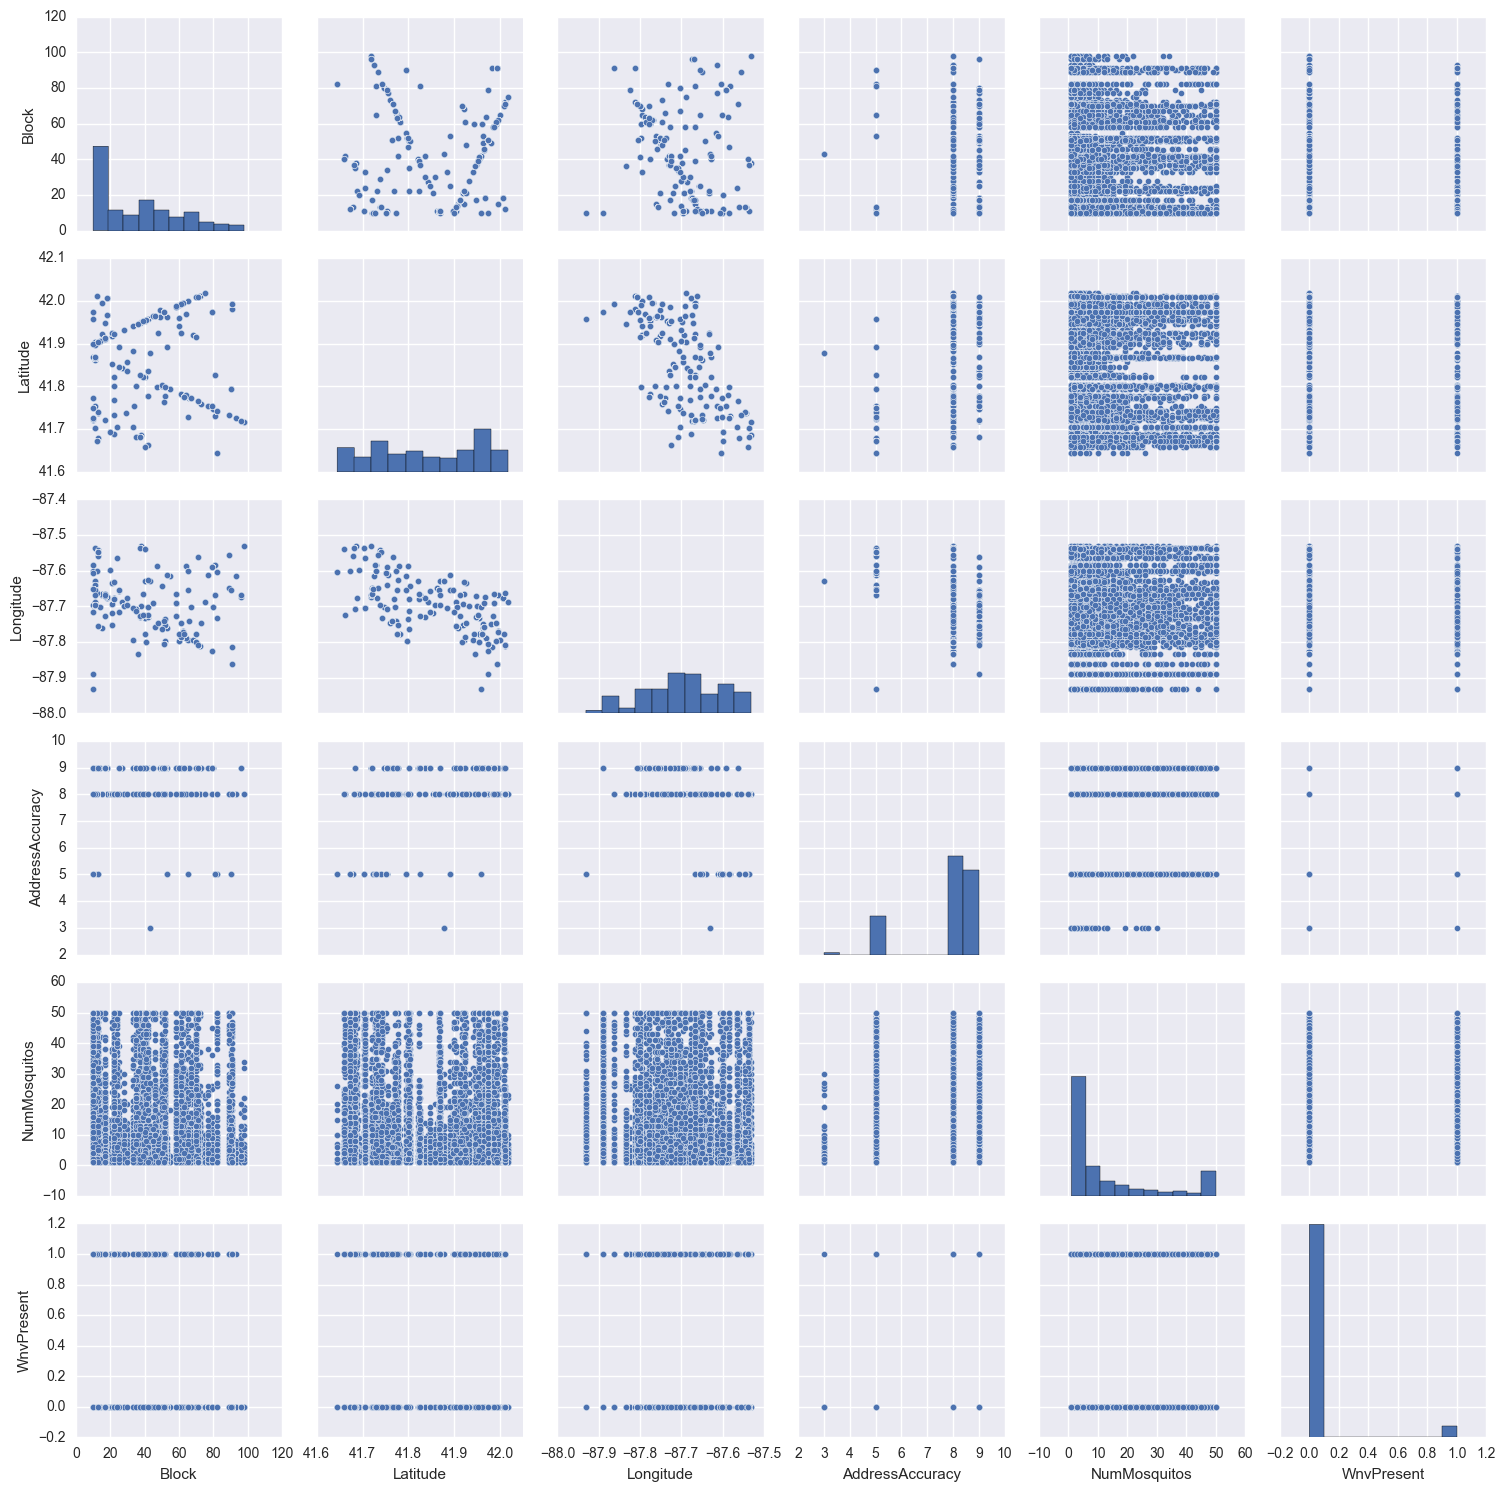

In [45]:
sns.pairplot(df_train)

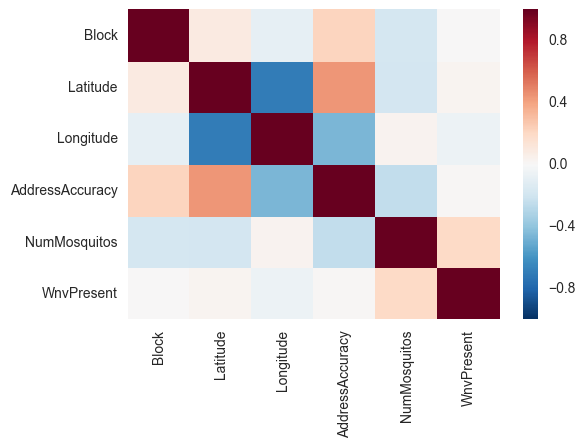

In [46]:
sns.heatmap(df_train.corr())

In [47]:
#convert the categorical data into dummies for Train data
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df_train['Species'] = le.fit_transform(df_train['Species'])
df_train['Street'] = le.fit_transform(df_train['Street'])
df_train['Trap'] = le.fit_transform(df_train['Trap'])

In [48]:
print "Clean and converted train data:"
df_train.head(2)

Clean and converted train data:


Date  Species  Block  Street  Trap  Latitude  Longitude  \
0  2007-05-29        2     41      32     1  41.95469 -87.800991   
1  2007-05-29        3     41      32     1  41.95469 -87.800991   

   AddressAccuracy  NumMosquitos  WnvPresent  
0                9             1           0  
1                9             1           0

In [49]:
df_train['Date'] = pd.to_datetime(df_train['Date'])
df_train['Year'] = df_train['Date'].dt.year
df_train['Month'] = df_train['Date'].dt.month
df_train['Day'] = df_train['Date'].dt.day

In [50]:
#convert the categorical data into dummies for Test data
df_test['Species'] = le.fit_transform(df_test['Species'])
df_test['Street'] = le.fit_transform(df_test['Street'])
df_test['Trap'] = le.fit_transform(df_test['Trap'])

In [51]:
df_test.head(2)

Date  Species  Block  Street  Trap  Latitude  Longitude  \
0  2008-06-11        2     41      36     1  41.95469 -87.800991   
1  2008-06-11        3     41      36     1  41.95469 -87.800991   

   AddressAccuracy  
0                9  
1                9

In [52]:
df_test['Date'] = pd.to_datetime(df_test['Date'])
df_test['Year'] = df_test['Date'].dt.year
df_test['Month'] = df_test['Date'].dt.month
df_test['Day'] = df_test['Date'].dt.day

In [53]:
df_weather.head(2)

Station        Date  Tmax  Tmin Tavg Depart  DewPoint WetBulb Heat Cool  \
0        1  2007-05-01    83    50   67     14        51      56    0    2   
1        2  2007-05-01    84    52   68      M        51      57    0    3   

  Sunrise Sunset CodeSum Depth Water1 SnowFall PrecipTotal StnPressure  \
0    0448   1849             0      M      0.0        0.00       29.10   
1       -      -             M      M        M        0.00       29.18   

  SeaLevel  ResultSpeed  ResultDir AvgSpeed  
0    29.82          1.7         27      9.2  
1    29.82          2.7         25      9.6

In [54]:
df_weather['Station'].value_counts()

1    1472
2    1472
Name: Station, dtype: int64

In [55]:
print "Weather minimum and Maximum for Station==1"
print df_weather[df_weather['Station']==1]['Date'].min()
print df_weather[df_weather['Station']==1]['Date'].max()

print "Weather minimum and Maximum for Station==2"
print df_weather[df_weather['Station']==2]['Date'].min()
print df_weather[df_weather['Station']==2]['Date'].max()

Weather minimum and Maximum for Station==1
2007-05-01
2014-10-31
Weather minimum and Maximum for Station==2
2007-05-01
2014-10-31


In [56]:
print "Train Data minimum and Maximum range"
print df_train['Date'].min()
print df_train['Date'].max()

Train Data minimum and Maximum range
2007-05-29 00:00:00
2013-09-26 00:00:00


In [57]:
print "Test Data minimum and Maximum range"
print df_test['Date'].min()
print df_test['Date'].max()

Test Data minimum and Maximum range
2008-06-11 00:00:00
2014-10-02 00:00:00


In [58]:
weather_stn1 = df_weather[df_weather['Station']==1]
weather_stn2 = df_weather[df_weather['Station']==2]
weather_stn1 = weather_stn1.drop('Station', axis=1)
weather_stn2 = weather_stn2.drop('Station', axis=1)
df_weather = weather_stn1.merge(weather_stn2, on='Date')

In [59]:
df_weather.head(2)

Date  Tmax_x  Tmin_x Tavg_x Depart_x  DewPoint_x WetBulb_x Heat_x  \
0  2007-05-01      83      50     67       14          51        56      0   
1  2007-05-02      59      42     51       -3          42        47     14   

  Cool_x Sunrise_x Sunset_x CodeSum_x Depth_x Water1_x SnowFall_x  \
0      2      0448     1849                 0        M        0.0   
1      0      0447     1850        BR       0        M        0.0   

  PrecipTotal_x StnPressure_x SeaLevel_x  ResultSpeed_x  ResultDir_x  \
0          0.00         29.10      29.82            1.7           27   
1          0.00         29.38      30.09           13.0            4   

  AvgSpeed_x  Tmax_y  Tmin_y Tavg_y Depart_y  DewPoint_y WetBulb_y Heat_y  \
0        9.2      84      52     68        M          51        57      0   
1       13.4      60      43     52        M          42        47     13   

  Cool_y Sunrise_y Sunset_y CodeSum_y Depth_y Water1_y SnowFall_y  \
0      3         -        -                 M        M          M   
1      0         -        -     BR HZ       M        M          M   

  PrecipTotal_y StnPressure_y SeaLevel_y  ResultSpeed_y  ResultDir_y  \
0          0.00         29.18      29.82            2.7           25   
1          0.00         29.44      30.08           13.3            2   

  AvgSpeed_y  
0        9.6  
1       13.4

In [60]:
#deleting unncessary column
del df_weather['CodeSum_x']
del df_weather['CodeSum_y']
del df_weather['Sunrise_x']
del df_weather['Sunrise_y']
del df_weather['Sunset_x']
del df_weather['Sunset_y']

In [61]:
df_weather['Date'] = pd.to_datetime(df_weather['Date'])

In [62]:
df_weather['Tavg_x'] = df_weather['Tavg_x'].astype(int)
df_weather['Depart_x'] = df_weather['Depart_x'].astype(int)

In [63]:
def convert(x):
    if x=='M':
        return '0'
    else:
        return x

df_weather['WetBulb_x']=df_weather['WetBulb_x'].map(convert)

In [64]:
df_weather['WetBulb_x'] = df_weather['WetBulb_x'].astype(int)
df_weather['Heat_x'] = df_weather['Heat_x'].astype(int)

In [65]:
del df_weather['Water1_x']
del df_weather['Water1_y']

In [66]:
df_weather['SnowFall_x']=df_weather['SnowFall_x'].map({'  T':'1', '0.0':'0', '0.1':'1'})

In [67]:
def convert_T(x):
    if x=='  T':
        return '0.0'
    else:
        return x

In [68]:
df_weather['PrecipTotal_x']=df_weather['PrecipTotal_x'].map(convert_T)
df_weather['PrecipTotal_x']= df_weather['PrecipTotal_x'].astype(float)

In [69]:
df_weather = df_weather.replace({'M':'0','  T':'0'})

In [70]:
df_weather['StnPressure_x']= df_weather['StnPressure_x'].astype(float)

In [75]:
df_weather['SeaLevel_x']= df_weather['SeaLevel_x'].astype(float)
df_weather['AvgSpeed_y']= df_weather['AvgSpeed_y'].astype(float)


In [76]:
for col in df_weather.columns:
    print col
    if df_weather[col].dtypes=='object':
        df_weather[col] = df_weather[col].astype(int)

Date
Tmax_x
Tmin_x
Tavg_x
Depart_x
DewPoint_x
WetBulb_x
Heat_x
Cool_x
Depth_x
SnowFall_x
PrecipTotal_x
StnPressure_x
SeaLevel_x
ResultSpeed_x
ResultDir_x
AvgSpeed_x


ValueError: invalid literal for long() with base 10: '9.2'

## Merge Train Data with Weather Data

In [77]:
df_train_weather = df_train.merge(df_weather, on='Date')

In [78]:
print df_train_weather.shape
df_train_weather.head()

(10506, 45)


Date  Species  Block  Street  Trap   Latitude  Longitude  \
0 2007-05-29        2     41      32     1  41.954690 -87.800991   
1 2007-05-29        3     41      32     1  41.954690 -87.800991   
2 2007-05-29        3     62      27     6  41.994991 -87.769279   
3 2007-05-29        2     79     109    13  41.974089 -87.824812   
4 2007-05-29        3     79     109    13  41.974089 -87.824812   

   AddressAccuracy  NumMosquitos  WnvPresent  Year  Month  Day  Tmax_x  \
0                9             1           0  2007      5   29      88   
1                9             1           0  2007      5   29      88   
2                9             1           0  2007      5   29      88   
3                8             1           0  2007      5   29      88   
4                8             4           0  2007      5   29      88   

   Tmin_x  Tavg_x  Depart_x  DewPoint_x  WetBulb_x  Heat_x  Cool_x  Depth_x  \
0      60      74        10          58         65       0       9        0   
1      60      74        10          58         65       0       9        0   
2      60      74        10          58         65       0       9        0   
3      60      74        10          58         65       0       9        0   
4      60      74        10          58         65       0       9        0   

   SnowFall_x  PrecipTotal_x  StnPressure_x  SeaLevel_x  ResultSpeed_x  \
0           0            0.0          29.39       30.11            5.8   
1           0            0.0          29.39       30.11            5.8   
2           0            0.0          29.39       30.11            5.8   
3           0            0.0          29.39       30.11            5.8   
4           0            0.0          29.39       30.11            5.8   

   ResultDir_x AvgSpeed_x  Tmax_y  Tmin_y Tavg_y Depart_y  DewPoint_y  \
0           18        6.5      88      65     77        0          59   
1           18        6.5      88      65     77        0          59   
2           18        6.5      88      65     77        0          59   
3           18        6.5      88      65     77        0          59   
4           18        6.5      88      65     77        0          59   

  WetBulb_y Heat_y Cool_y Depth_y SnowFall_y PrecipTotal_y StnPressure_y  \
0        66      0     12       0          0          0.00         29.44   
1        66      0     12       0          0          0.00         29.44   
2        66      0     12       0          0          0.00         29.44   
3        66      0     12       0          0          0.00         29.44   
4        66      0     12       0          0          0.00         29.44   

  SeaLevel_y  ResultSpeed_y  ResultDir_y  AvgSpeed_y  
0      30.09            5.8           16         7.4  
1      30.09            5.8           16         7.4  
2      30.09            5.8           16         7.4  
3      30.09            5.8           16         7.4  
4      30.09            5.8           16         7.4

## Merge Test Data with Weather Data

In [79]:
df_test_weather = df_test.merge(df_weather, on='Date')

In [80]:
df_test_weather.head(5)

Date  Species  Block  Street  Trap  Latitude  Longitude  \
0 2008-06-11        2     41      36     1  41.95469 -87.800991   
1 2008-06-11        3     41      36     1  41.95469 -87.800991   
2 2008-06-11        1     41      36     1  41.95469 -87.800991   
3 2008-06-11        4     41      36     1  41.95469 -87.800991   
4 2008-06-11        6     41      36     1  41.95469 -87.800991   

   AddressAccuracy  Year  Month  Day  Tmax_x  Tmin_x  Tavg_x  Depart_x  \
0                9  2008      6   11      86      61      74         7   
1                9  2008      6   11      86      61      74         7   
2                9  2008      6   11      86      61      74         7   
3                9  2008      6   11      86      61      74         7   
4                9  2008      6   11      86      61      74         7   

   DewPoint_x  WetBulb_x  Heat_x  Cool_x  Depth_x  SnowFall_x  PrecipTotal_x  \
0          56         64       0       9        0           0            0.0   
1          56         64       0       9        0           0            0.0   
2          56         64       0       9        0           0            0.0   
3          56         64       0       9        0           0            0.0   
4          56         64       0       9        0           0            0.0   

   StnPressure_x  SeaLevel_x  ResultSpeed_x  ResultDir_x AvgSpeed_x  Tmax_y  \
0          29.28       29.99            8.9           18       10.0      86   
1          29.28       29.99            8.9           18       10.0      86   
2          29.28       29.99            8.9           18       10.0      86   
3          29.28       29.99            8.9           18       10.0      86   
4          29.28       29.99            8.9           18       10.0      86   

   Tmin_y Tavg_y Depart_y  DewPoint_y WetBulb_y Heat_y Cool_y Depth_y  \
0      66     76        0          55        64      0     11       0   
1      66     76        0          55        64      0     11       0   
2      66     76        0          55        64      0     11       0   
3      66     76        0          55        64      0     11       0   
4      66     76        0          55        64      0     11       0   

  SnowFall_y PrecipTotal_y StnPressure_y SeaLevel_y  ResultSpeed_y  \
0          0          0.00         29.34      29.97            9.4   
1          0          0.00         29.34      29.97            9.4   
2          0          0.00         29.34      29.97            9.4   
3          0          0.00         29.34      29.97            9.4   
4          0          0.00         29.34      29.97            9.4   

   ResultDir_y  AvgSpeed_y  
0           18        10.4  
1           18        10.4  
2           18        10.4  
3           18        10.4  
4           18        10.4

# Preparing X,y for Train and Test data

In [81]:
Train_y = df_train_weather['WnvPresent']

In [82]:
del df_train_weather['WnvPresent']

In [83]:
del df_train_weather['NumMosquitos']

In [84]:
Train_X = df_train_weather.iloc[:,1:]

In [85]:
Test_X = df_test_weather.iloc[:,1:]

In [86]:
df_test_weather.head()

Date  Species  Block  Street  Trap  Latitude  Longitude  \
0 2008-06-11        2     41      36     1  41.95469 -87.800991   
1 2008-06-11        3     41      36     1  41.95469 -87.800991   
2 2008-06-11        1     41      36     1  41.95469 -87.800991   
3 2008-06-11        4     41      36     1  41.95469 -87.800991   
4 2008-06-11        6     41      36     1  41.95469 -87.800991   

   AddressAccuracy  Year  Month  Day  Tmax_x  Tmin_x  Tavg_x  Depart_x  \
0                9  2008      6   11      86      61      74         7   
1                9  2008      6   11      86      61      74         7   
2                9  2008      6   11      86      61      74         7   
3                9  2008      6   11      86      61      74         7   
4                9  2008      6   11      86      61      74         7   

   DewPoint_x  WetBulb_x  Heat_x  Cool_x  Depth_x  SnowFall_x  PrecipTotal_x  \
0          56         64       0       9        0           0            0.0   
1          56         64       0       9        0           0            0.0   
2          56         64       0       9        0           0            0.0   
3          56         64       0       9        0           0            0.0   
4          56         64       0       9        0           0            0.0   

   StnPressure_x  SeaLevel_x  ResultSpeed_x  ResultDir_x AvgSpeed_x  Tmax_y  \
0          29.28       29.99            8.9           18       10.0      86   
1          29.28       29.99            8.9           18       10.0      86   
2          29.28       29.99            8.9           18       10.0      86   
3          29.28       29.99            8.9           18       10.0      86   
4          29.28       29.99            8.9           18       10.0      86   

   Tmin_y Tavg_y Depart_y  DewPoint_y WetBulb_y Heat_y Cool_y Depth_y  \
0      66     76        0          55        64      0     11       0   
1      66     76        0          55        64      0     11       0   
2      66     76        0          55        64      0     11       0   
3      66     76        0          55        64      0     11       0   
4      66     76        0          55        64      0     11       0   

  SnowFall_y PrecipTotal_y StnPressure_y SeaLevel_y  ResultSpeed_y  \
0          0          0.00         29.34      29.97            9.4   
1          0          0.00         29.34      29.97            9.4   
2          0          0.00         29.34      29.97            9.4   
3          0          0.00         29.34      29.97            9.4   
4          0          0.00         29.34      29.97            9.4   

   ResultDir_y  AvgSpeed_y  
0           18        10.4  
1           18        10.4  
2           18        10.4  
3           18        10.4  
4           18        10.4

In [87]:
print "Weather minimum and Maximum"
print df_weather['Date'].min()
print df_weather['Date'].max()


Weather minimum and Maximum
2007-05-01 00:00:00
2014-10-31 00:00:00


In [88]:
print "Number of Mosquitos species: ", len(df_train['Species'].value_counts())
df_train['Species'].value_counts()

Number of Mosquitos species:  7


2    4752
3    2740
1    2699
6     222
4      86
5       6
0       1
Name: Species, dtype: int64

# Baseline Accuracy

In [89]:
print "Baseline Accuracy: 0 - Not present, 1 - Present"
df_train['WnvPresent'].value_counts()/len(df_train['WnvPresent'])*100

Baseline Accuracy: 0 - Not present, 1 - Present


0    94.755378
1     5.244622
Name: WnvPresent, dtype: float64

# Data Visualisation

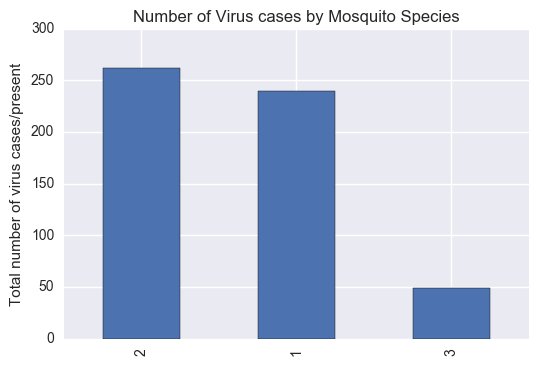

In [90]:
df_train[df_train['WnvPresent']==1]['Species'].value_counts().plot(kind='bar')
#df_train[df_train['WnvPresent']==0]['Species'].value_counts().plot(kind='bar')
plt.title("Number of Virus cases by Mosquito Species")
plt.ylabel("Total number of virus cases/present")
plt.show()

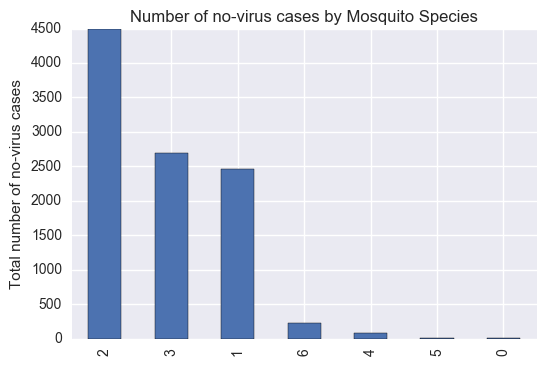

In [91]:
df_train[df_train['WnvPresent']==0]['Species'].value_counts().plot(kind='bar')
plt.title("Number of no-virus cases by Mosquito Species")
plt.ylabel("Total number of no-virus cases")
plt.show()

# PCA to Find Best Features

In [92]:
# Do PCA on Train_X and Train_y...
from sklearn.preprocessing import StandardScaler

XStand = StandardScaler().fit_transform(Train_X)

In [93]:
cov_mat = np.cov(XStand.T)

In [94]:
eigenValues, eigenVectors = np.linalg.eig(cov_mat)

In [95]:
eigenPairs = [(np.abs(eigenValues[i]), eigenVectors[:,i]) for i in range(len(eigenValues))]

In [96]:
eigenPairs.sort(key=lambda x: x[0])
eigenPairs.reverse()

for i in eigenPairs:
    print i[0]

12.9857439822
4.9835720334
2.39193274979
2.20123601949
1.77905589621
1.68017446556
1.51761094378
1.39606832638
1.16705613402
1.0328532906
0.891206319324
0.861364390504
0.801422584165
0.782673656112
0.666649322645
0.565449848265
0.563297086829
0.514221384019
0.318008988234
0.212902923577
0.168066446796
0.166705600382
0.126609965682
0.0885423194933
0.0636113173082
0.0343814718621
0.0125008528474
0.00923217393838
0.0065669284211
0.00494965804586
0.00464064347307
0.00240706165052
0.00101254744608
0.000829322048085
0.000630989295313
0.000429681243963
1.39129989354e-15
2.62004018862e-16
0.0
0.0
0.0
0.0


In [97]:
totalEigen = sum(eigenValues)
varExpl = [(i/totalEigen)*100 for i in sorted(eigenValues, reverse=True)]

In [98]:
cVarExp = np.cumsum(varExpl)
print cVarExp

[  34.16975777   47.28317271   53.57713344   59.36930843   64.05058885
   68.47167975   72.46501262   76.13852694   79.20943497   81.92721123
   84.27226779   86.53880043   88.64760648   90.70707795   92.46125129
   93.94913557   95.43135523   96.78444059   97.6212267    98.18144422
   98.62368224   99.06233944   99.39549184   99.62847577   99.79585804
   99.88632698   99.91922083   99.94351371   99.96079346   99.97381764
   99.98602869   99.99236246   99.99502681   99.99720903   99.99886937
  100.          100.          100.          100.          100.          100.
  100.        ]


In [99]:
# mat = []
# for i in range(10):
#     mat.append(i)
#     for j in range(len(eigenVectors)):
#         mat.append(eigenPairs[i][1][j])

# BestFeatures = pd.DataFrame(mat)

Feat = pd.DataFrame()

for i in range(10):
    for j in range(len(eigenVectors)):
        Feat.loc[i,j] = eigenPairs[i][1][j]

Feat


0         1         2         3         4         5         6   \
0 -0.019846 -0.002467 -0.007152 -0.003312 -0.025930  0.030314 -0.028839   
1  0.068773  0.004472  0.007532  0.013989  0.043373 -0.042535  0.034784   
2  0.120822  0.138932  0.106157 -0.144045  0.417471 -0.421755  0.376443   
3  0.058954  0.086467  0.105724 -0.019564  0.291051 -0.311671  0.250207   
4  0.089597 -0.047071 -0.001478  0.034698 -0.040957  0.033416 -0.051336   
5  0.080244 -0.079048 -0.031081  0.126642 -0.166463  0.143524 -0.135019   
6  0.195289 -0.237023  0.125886  0.354640 -0.125266  0.033906 -0.165891   
7  0.164864  0.455381 -0.576838 -0.373013 -0.083218  0.310904  0.103178   
8  0.269849  0.100215 -0.107140 -0.005162 -0.043509  0.065172  0.034345   
9 -0.397161 -0.029266 -0.059889 -0.103370  0.056205 -0.021153  0.028364   

         7         8         9         10        11        12        13  \
0 -0.041262 -0.016826  0.014528  0.247950  0.258240  0.270299  0.223755   
1  0.056365 -0.164016  0.123602 -0.098252 -0.023541 -0.067327 -0.071775   
2  0.124113 -0.268017  0.050686 -0.029175  0.014842 -0.006938 -0.107251   
3  0.254766  0.098556  0.055079  0.125437 -0.034005  0.049113  0.080832   
4  0.057300 -0.186434  0.040225  0.082659  0.042538  0.069171  0.045192   
5  0.044421 -0.224349  0.128724  0.037708 -0.030985  0.004838 -0.107641   
6  0.381829 -0.322015  0.280254 -0.036352  0.030850 -0.010051 -0.159493   
7  0.118462 -0.107177  0.127657  0.002431 -0.002145 -0.000666 -0.037562   
8  0.069888 -0.172886 -0.493131  0.063598 -0.058404  0.008056 -0.127177   
9 -0.151473 -0.031854  0.344030 -0.084247  0.030250 -0.031426 -0.125538   

         14        15        16        17   18        19        20        21  \
0  0.257345  0.197033 -0.204427  0.255473  0.0  0.023615  0.074784 -0.012917   
1 -0.011208 -0.044889  0.075140 -0.051401  0.0  0.050710  0.169773 -0.033285   
2  0.051902 -0.074645 -0.005414 -0.011942  0.0  0.086858  0.151690 -0.146378   
3 -0.077074  0.050310 -0.172398 -0.021891  0.0  0.052023 -0.252741  0.103956   
4 -0.074646 -0.386925 -0.107869  0.037319  0.0 -0.024079 -0.198829 -0.535912   
5 -0.084884 -0.171331 -0.115901 -0.052115  0.0 -0.036635 -0.232380 -0.203132   
6  0.058915  0.166369 -0.140495 -0.084296  0.0  0.362470  0.108016  0.209452   
7  0.015935 -0.029245 -0.089085 -0.045876  0.0  0.242560  0.107791 -0.047731   
8 -0.088788  0.245514 -0.158029 -0.069121  0.0 -0.219874 -0.131492  0.398264   
9  0.047965  0.052001 -0.379671 -0.233458  0.0 -0.418675 -0.085030  0.060139   

         22        23        24        25        26        27        28   29  \
0 -0.146373  0.021529  0.046167  0.045365  0.253020  0.261231  0.269565  0.0   
1 -0.266686  0.376522  0.174856  0.391732 -0.077311 -0.029609 -0.059018  0.0   
2 -0.168355 -0.181940 -0.160959 -0.168759 -0.027000 -0.003997 -0.017294  0.0   
3  0.194647  0.146167  0.308413  0.074765  0.127213 -0.003178  0.071565  0.0   
4  0.084408  0.165003 -0.336487  0.103205  0.066038  0.096079  0.081439  0.0   
5 -0.260331 -0.151257  0.309350 -0.169999  0.030602 -0.056165 -0.010732  0.0   
6  0.118422 -0.036514 -0.070888 -0.024386 -0.031825  0.035709  0.003281  0.0   
7  0.090320 -0.016057  0.066818 -0.001779  0.007852 -0.003792  0.003725  0.0   
8 -0.138487  0.102507 -0.217477 -0.022304  0.048313 -0.040314  0.004145  0.0   
9  0.003145  0.000291 -0.053596  0.027038 -0.110316  0.025272 -0.049733  0.0   

         30        31        32        33   34   35        36        37  \
0  0.255830  0.270711 -0.199886  0.257758  0.0  0.0  0.053328 -0.138549   
1 -0.018973 -0.050398  0.071941 -0.044064  0.0  0.0  0.105343 -0.269854   
2  0.066345  0.031295 -0.005898 -0.024754  0.0  0.0  0.133922 -0.173424   
3 -0.116403 -0.039287 -0.173351  0.015632  0.0  0.0 -0.328798  0.203104   
4 -0.070994 -0.015141 -0.114471  0.054133  0.0  0.0 -0.219014  0.093372   
5 -0.086561 -0.052796 -0.108677 -0.061458  0.0  0.0 -0.289634 -0.254030   
6  0.038025  0.013178 -0.154852 -0.063765  0.0  0.0  0.153803  0.13098

In [100]:
Train_X.shape

(10506, 42)

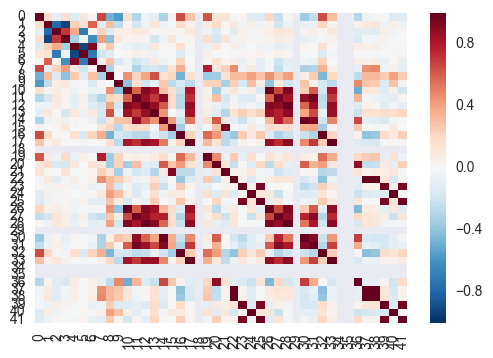

In [101]:
sns.heatmap(Feat.corr())

In [102]:
from sklearn.decomposition import PCA

pcask = PCA(n_components = 10)

pcaY = pcask.fit_transform(XStand)

pcaYdf = pd.DataFrame(pcaY, columns = ["PC1","PC2","PC3","PC4","PC5","PC6","PC7","PC8","PC9","PC10"])

pcaYdf

PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0     -0.424683 -0.978152  1.115533 -1.686570  0.944258  0.633536 -0.109861   
1     -0.403560 -0.904955  1.244130 -1.749313  1.039621  0.548129  0.098012   
2     -0.402675 -0.898851  1.342601 -1.808951  0.999821  0.608871 -0.113357   
3     -0.412959 -0.957420  1.426192 -1.989328  0.898016  0.754858 -0.030291   
4     -0.391836 -0.884223  1.554789 -2.052070  0.993379  0.669451  0.177583   
5     -0.455123 -0.975762  0.286766 -1.219766  1.206613  0.104181  1.141945   
6     -0.467679 -0.993615  0.132348 -1.094864  1.203944  0.058202  1.040688   
7     -0.493550 -1.075823 -0.141987 -0.949813  1.145751  0.065216  1.050669   
8     -0.472427 -1.002626 -0.013389 -1.012555  1.241114 -0.020191  1.258542   
9     -0.468393 -0.993849  0.049855 -1.045194  1.231660  0.007896  1.180423   
10    -0.483540 -1.052147  0.042491 -1.015556  1.098558  0.159620  0.621534   
11    -0.506812 -1.082522 -0.289370 -0.755959  1.119862  0.047983  0.567011   
12    -0.485690 -1.009325 -0.160773 -0.818701  1.215225 -0.037424  0.774884   
13    -0.530956 -1.129594 -0.852413 -0.483139  1.208808 -0.253548  1.275624   
14    -0.509834 -1.056396 -0.723816 -0.545881  1.304171 -0.338955  1.483497   
15    -0.481853 -1.005009 -0.315413 -0.827164  1.275817 -0.182575  1.397994   
16    -0.482996 -1.020465 -0.398122 -0.789488  1.274934 -0.236381  1.488835   
17    -0.496127 -1.033325 -0.550959 -0.696463  1.295206 -0.289846  1.560893   
18    -0.538372 -1.179720 -0.808154 -0.570979  1.104480 -0.119032  1.145147   
19    -0.568273 -1.148952 -1.182462 -0.252826  1.221793 -0.326100  1.127836   
20    -0.547151 -1.075754 -1.053864 -0.315568  1.317155 -0.411508  1.335709   
21    -0.426376 -0.952558  0.821202 -1.654383  0.994323  0.400819  0.493941   
22    -0.454417 -0.989267  0.459940 -1.389434  1.009893  0.285189  0.461062   
23    -0.442597 -0.936797  0.121274 -1.169356  1.240455 -0.069972  1.369995   
24    -0.504724 -1.032091 -0.536439 -0.693067  1.203405 -0.250020  1.022832   
25     6.721714  2.619947  3.148688  3.368982 -0.584002  0.274810 -2.191205   
26     6.742836  2.693145  3.277285  3.306240 -0.488639  0.189403 -1.983332   
27     6.700591  2.546750  3.020090  3.431724 -0.679365  0.360217 -2.399079   
28     6.733438  2.640680  3.459346  3.066224 -0.630244  0.396132 -2.111635   
29     6.754560  2.713877  3.587944  3.003482 -0.534881  0.310725 -1.903761   
...         ...       ...       ...       ...       ...       ...       ...   
10476  4.087375 -1.979411 -1.319164  0.919000  0.334808 -0.931199  1.545966   
10477  4.108498 -1.906213 -1.190567  0.856258  0.430171 -1.016606  1.753839   
10478  4.066253 -2.052608 -1.447761  0.981742  0.239445 -0.845792  1.338093   
10479  4.214394 -1.852156  1.159681 -0.677078 -0.136913  0.285158 -0.363474   
10480  4.101225 -1.963630 -1.287158  0.913340  0.262538 -0.954386  1.201996   
10481  4.122348 -1.890433 -1.158561  0.850598  0.357901 -1.039793  1.409869   
10482  4.080103 -2.036828 -1.415755  0.976082  0.167175 -0.868979  0.994123   
10483  4.318469 -1.625078  2.488765 -1.606534 -0.071973  0.534090 -0.150640   
10484  4.324841 -1.639334  1.777605 -1.424816  0.058694  0.074126  1.447029   
10485  4.324841 -1.639334  1.777605 -1.424816  0.058694  0.074126  1.447029   
10486  4.303718 -1.712531  1.649007 -1.362074 -0.036669  0.159534  1.239156   
10487  4.303718 -1.712531  1.649007 -1.362074 -0.036669  0.159534  1.239156   
10488  4.303718 -1.712531  1.649007 -1.362074 -0.036669  0.159534  1.239156   
10489  4.303718 -1.712531  1.649007 -1.362074 -0.036669  0.159534  1.239156   
10490  4.250269 -1.745039  0.970202 -0.793283  0.074843 -0.135397  1.146268   
10491  4.283215 -1.693431  1.428460 -1.040748  0.000087  0.049748  0.639553   
10492  4.262093 -1.766629  1.299863 -0.978006 -0.095276  0.135155  0.431679   
10493  4.197652 -1.824606  0.269634 -0.250108  0.084921 -0.367623  0.876416   
10494  4.080796 -1.974043 -1.405505  0.955335  0.278450 -0.973

# Model Creation

In [103]:
import itertools
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, GridSearchCV, train_test_split, StratifiedKFold
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, mean_squared_error
from imblearn.over_sampling import SMOTE

In [104]:
LR_X_train, LR_X_test, LR_y_train, LR_y_test = train_test_split(Train_X, Train_y, test_size=0.30, stratify = Train_y, random_state=42)

In [105]:
logreg = LogisticRegression()
logreg.fit(LR_X_train, LR_y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

## Train data score

In [106]:
y_pred_train = logreg.predict(LR_X_test)

acc_train = accuracy_score(LR_y_test, y_pred_train)
print "Training accuracy score:", acc_train

Training accuracy score: 0.947652284264


In [107]:
score_train = cross_val_score(logreg, Train_X, Train_y, cv=10)

In [108]:
print "Cross Validation Score:", score_train.mean()

Cross Validation Score: 0.932419454808


## Fine tuning with GridSearch

In [109]:
GS_X_Train, GS_X_test, GS_y_train, GS_y_test = train_test_split(Train_X, Train_y, test_size=0.30, random_state=42)
accuracy_s = []

In [110]:
GS_X_Train.shape

(7354, 42)

In [111]:
logreg_parameters = {
    'penalty':['l1','l2'],
    'C':range(1,11,1),
    'solver':['liblinear']
}
logreg_cv = LogisticRegression()


In [112]:
grid = GridSearchCV(logreg_cv, param_grid=logreg_parameters, cv=3)

In [113]:
grid.fit(GS_X_Train, GS_y_train)

GridSearchCV(cv=3, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'penalty': ['l1', 'l2'], 'C': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 'solver': ['liblinear']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [114]:
print "Grid Search best score:", grid.best_score_
print "Grid Search best parameters:", grid.best_params_

Grid Search best score: 0.947647538754
Grid Search best parameters: {'penalty': 'l1', 'C': 1, 'solver': 'liblinear'}


## Test data score

In [116]:
print GS_X_Train.shape
print GS_X_test.shape

(7354, 42)
(3152, 42)


In [117]:
logreg_better = LogisticRegression(penalty = 'l1', C = 1, solver = 'liblinear')
y_pred_test = logreg.predict(GS_X_test)

In [118]:
df_test_predict = pd.DataFrame(y_pred_test, columns=['Test_pred'])

In [119]:
print len(df_test_predict[df_test_predict['Test_pred']==0])
print len(df_test_predict[df_test_predict['Test_pred']==1])

3152
0


In [120]:
print "Test Data prediction score for each class"
df_test_predict['Test_pred'].value_counts()/len(df_test_predict['Test_pred'])*100

Test Data prediction score for each class


0    100.0
Name: Test_pred, dtype: float64

In [121]:
df_test_predict.to_csv('rn_ms_submission.csv', index=False)

# Plot ROC curve

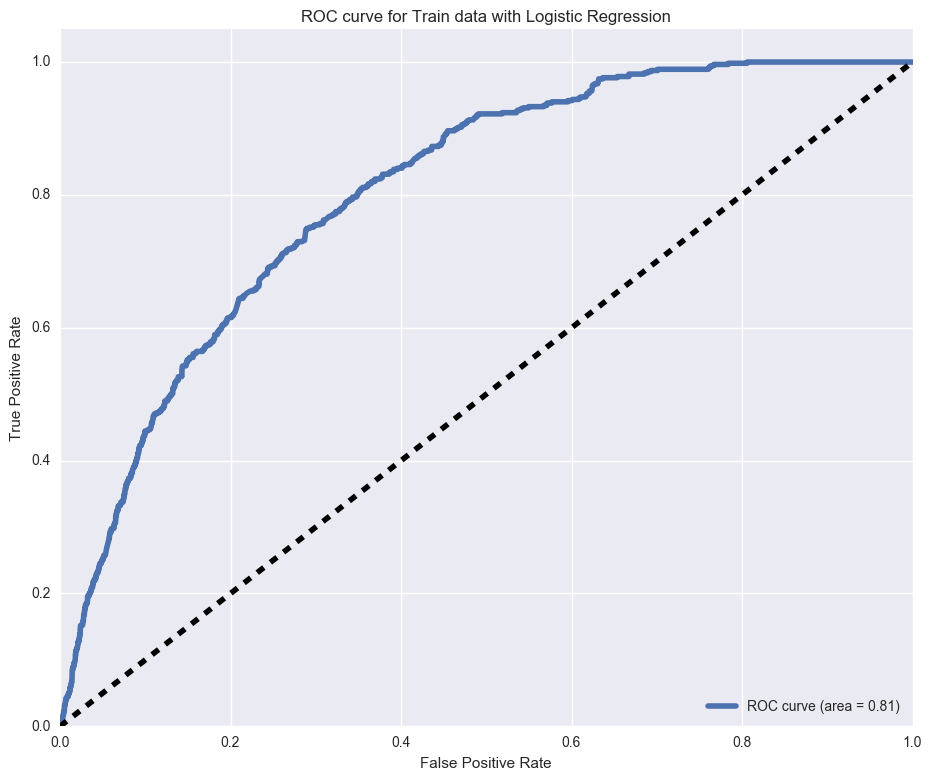

In [122]:

from sklearn.metrics import roc_curve, auc

y_score = logreg.decision_function(Train_X)

FPR = dict()
TPR = dict()
ROC_AUC = dict()

# For class 1, find the area under the curve
FPR[1], TPR[1], _ = roc_curve(Train_y, y_score)
ROC_AUC[1] = auc(FPR[1], TPR[1])

# Plot of a ROC curve for class 1
plt.figure(figsize=[11,9])
plt.plot(FPR[1], TPR[1], label='ROC curve (area = %0.2f)' % ROC_AUC[1], linewidth=4)
plt.plot([0, 1], [0, 1], 'k--', linewidth=4)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve for Train data with Logistic Regression')
plt.legend(loc="lower right")
plt.show()

# Build Decision Tree

In [130]:
from sklearn.tree import DecisionTreeClassifier


dtc = DecisionTreeClassifier(max_depth=50)
dtc.fit(Train_X,Train_y)

y_pred_train_dtc = dtc.predict(Train_X)

print "Accuracy of Train Data" , accuracy_score(Train_y, y_pred_train_dtc)
print classification_report(Train_y, y_pred_train_dtc)

Accuracy of Train Data 0.981058442795
             precision    recall  f1-score   support

          0       0.98      1.00      0.99      9955
          1       0.97      0.66      0.78       551

avg / total       0.98      0.98      0.98     10506



In [131]:
conmat = np.array(confusion_matrix(Train_y, y_pred_train_dtc))
print "Confusion Matrix based on Train data"
confusion = pd.DataFrame(conmat, index=['No_Virus', 'Virus_Present'],columns=['Predicted_No_Virus', 'Predicted_Virus_Present'])
confusion

Confusion Matrix based on Train data


Predicted_No_Virus  Predicted_Virus_Present
No_Virus                     9945                       10
Virus_Present                 189                      362

Decision Tree on Test Data